# IQ modulation for Chirp

In [15]:
%matplotlib inline
% run ./chirp.py

In [16]:
# Chirp bandwidth in Hz
BW = 2000

# Carrier in Hz
CARRIER=18000

In [44]:
F0 = -BW/2
F1 = +BW/2
T = TIME_FRAME

In [45]:
def carrier_IQ(iq, f=CARRIER):
    t = linspace(0, T, int(T * Fs))
    if iq == 'I':
        return cos(2 * pi * f * t)
    elif iq == 'Q':
        return sin(2 * pi * f * t)
    
def chirp_x_carrier(f0=F0, f1=F1, updown="up"):
    t = linspace(0, T, int(T * Fs))
    k = float(f1-f0)/float(T)
    if (updown == "up"):
        f = f0 + k * t / 2.0
    elif (updown == "down"):
        f = f1 - k * t / 2.0
    arg = 2 * pi * (CARRIER - f) * t
    return cos(arg) * AMPLITUDE

## Carrier

In [46]:
Ci = carrier_IQ('I')
Cq = carrier_IQ('Q')

Frequencies at peaks: [-18000.  18000.] Hz


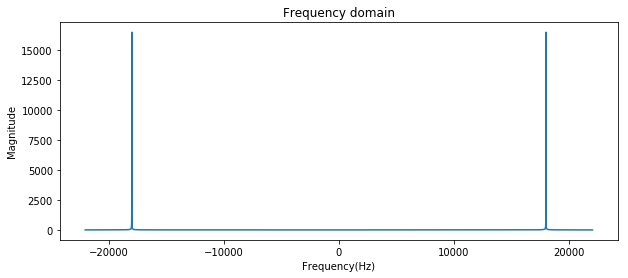

In [47]:
plot_fft(Ci)

Frequencies at peaks: [-18000.  18000.] Hz


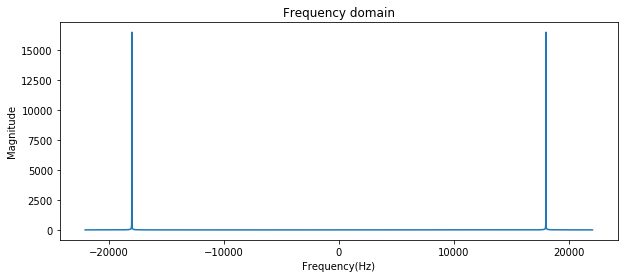

In [48]:
plot_fft(Cq)

## Baseband signal

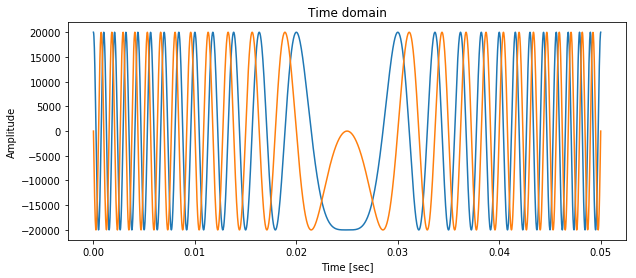

In [49]:
# Up chipr
plot_wave(chirp(f0=F0, f1=F1, T=0.05, phase=0), real_only=False)

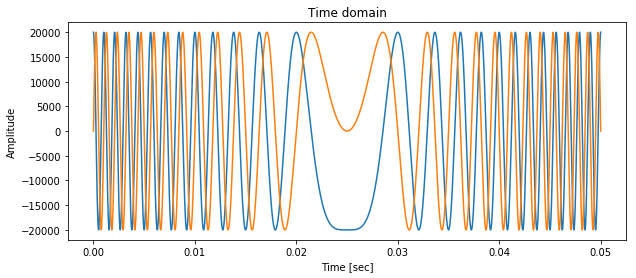

In [50]:
# Down chirp
plot_wave(chirp(f0=F0, f1=F1, T=0.05, phase=0).conjugate(), real_only=False)

## I/Q modulation 

In [52]:
WW = chirp_x_carrier(f0=F0, f1=F1)
WWd = chirp_x_carrier(f0=F0, f1=F1, updown="down")

Frequencies at peaks: [-18962. -17039.  17039.  18962.] Hz


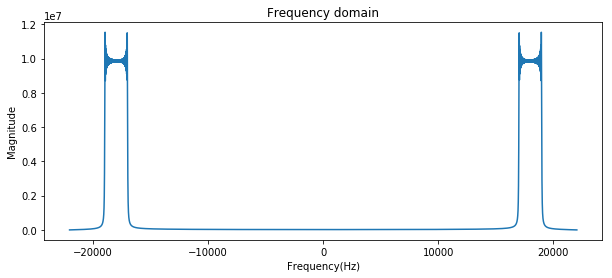

In [53]:
plot_fft(WW)

## I/Q demodulation

In [55]:
Ri = WW*carrier_IQ('I')
Rq = WW*carrier_IQ('Q')
Rid = WWd*carrier_IQ('I')
Rqd = WWd*carrier_IQ('Q')

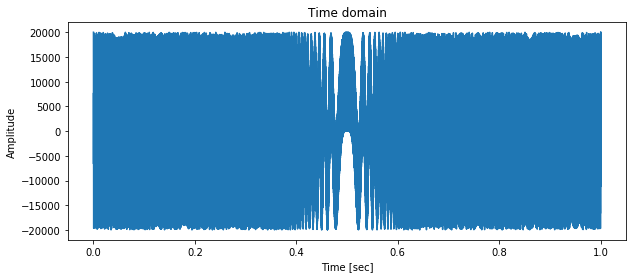

In [56]:
plot_wave(Ri)

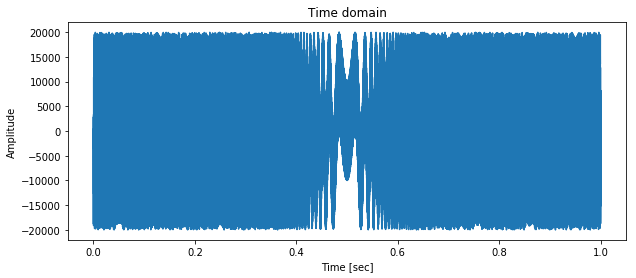

In [57]:
plot_wave(Rq)

Frequencies at peaks: [-950. -933. -919. -908. -897. -888. -879. -871. -864. -857. -850. -843.
 -837. -831. -825. -820. -814. -809. -804. -799. -794. -789. -784. -780.
 -775. -771. -762. -758. -754. -750. -746. -742. -738. -731. -727. -720.
 -716. -713. -709. -706. -699. -696. -689. -686. -683. -680. -677. -656.
 -653. -650. -647. -636. -633. -628. -625. -620. -617. -612. -607. -602.
 -597. -592. -587. -580. -575. -573. -568. -566. -559. -552. -550. -541.
 -539. -537. -526. -524. -522. -520. -518. -482. -480. -478. -476. -474.
 -463. -461. -459. -450. -448. -441. -434. -432. -427. -425. -420. -413.
 -408. -403. -398. -393. -388. -383. -380. -375. -372. -367. -364. -361.
 -353. -350. -347. -344. -323. -320. -317. -314. -304. -301. -294. -291.
 -287. -284. -280. -273. -269. -262. -258. -254. -250. -246. -242. -238.
 -229. -225. -220. -216. -211. -206. -201. -196. -191. -186. -180. -175.
 -169. -163. -157. -150. -143. -136. -128. -120. -112. -103.  -92.  -81.
  -67.  -50.  -22.   22.   50

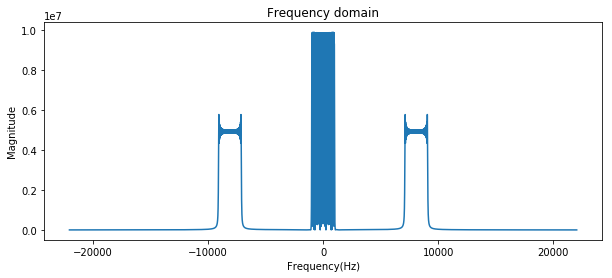

In [58]:
plot_fft(Ri)

Frequencies at peaks: [-961.  961.] Hz


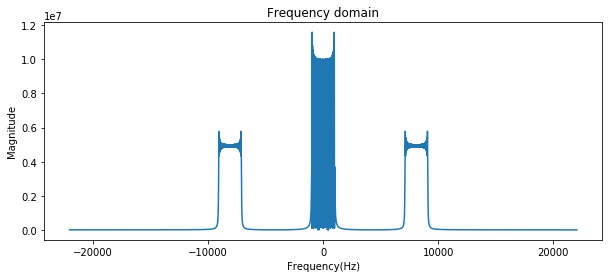

In [59]:
plot_fft(Rq)

## Low-pass filter to remove 2 * carrier frequency terms

In [60]:
# LPF
CUTOFF = 3000
R = lpf(Ri, CUTOFF) + 1j*lpf(Rq, CUTOFF)
Rd = lpf(Rid, CUTOFF) + 1j*lpf(Rqd, CUTOFF)

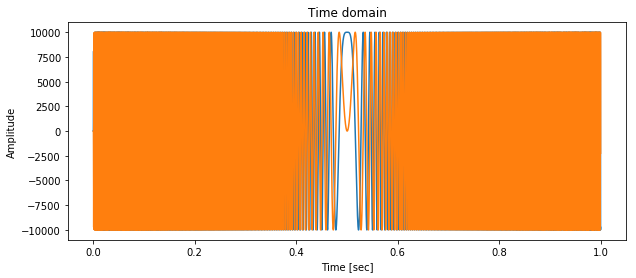

In [61]:
plot_wave(R, real_only=False)

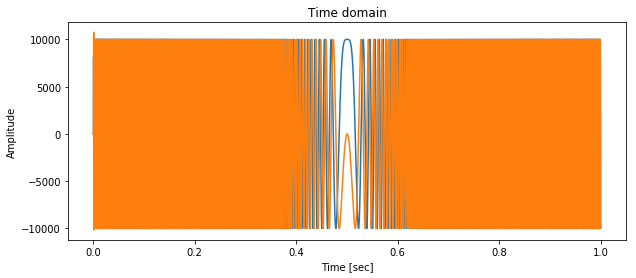

In [62]:
plot_wave(Rd, real_only=False)

Frequencies at peaks: [-962.  961.] Hz


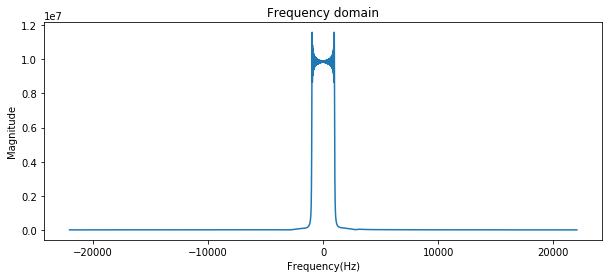

In [63]:
plot_fft(R)

Frequencies at peaks: [-961.  962.] Hz


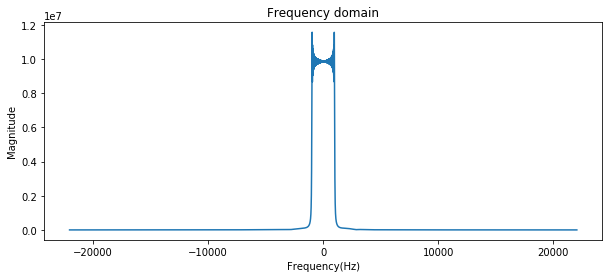

In [64]:
plot_fft(Rd)

## Anlyzing baseband signal

Frequencies at peaks: [-1945.  1945.] Hz


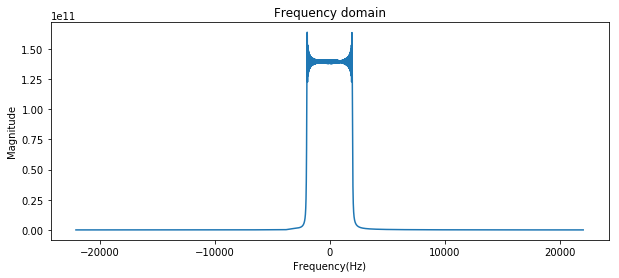

In [66]:
# Up-chirp detection fails
plot_fft(R*chirp(f0=F0, f1=F1), logscale=False)

Frequencies at peaks: [-1.] Hz


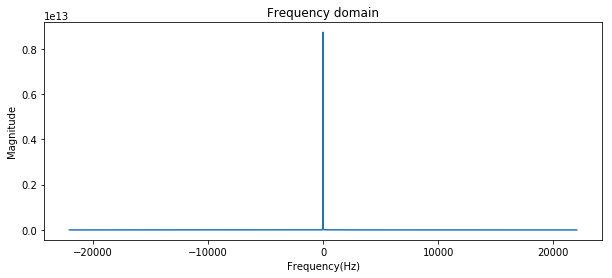

In [67]:
# Up-chirp detection suceeds
plot_fft(R*chirp(f0=F0, f1=F1).conjugate(), logscale=False)

Frequencies at peaks: [1.] Hz


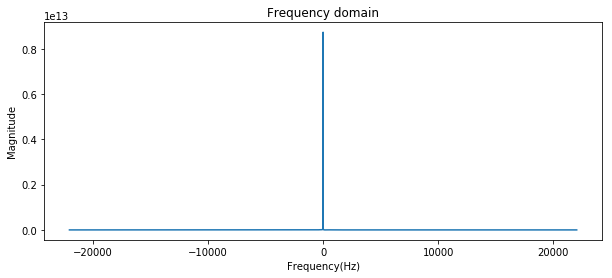

In [68]:
# Down-chirp detection suceeds
plot_fft(Rd*chirp(f0=F0, f1=F1), logscale=False)

Frequencies at peaks: [-1945.  1945.] Hz


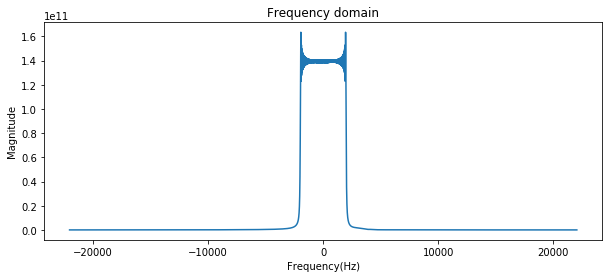

In [69]:
# Down-chirp detection fails
plot_fft(Rd*chirp(f0=F0, f1=F1).conjugate(), logscale=False)